<a href="https://colab.research.google.com/github/nrhodes-hmc/HMC-NN-Sp21/blob/main/NNSP21_Day_1_assignment_My_First_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following code installs the fastai library. It'll need to be run every time you have to restart the runtime. Good news is that it is relatively quick to run if fastai has already been installed.

Question: What does the `U` flag do?

Question: What do the two `q` flags do?

In [1]:
!pip install -Uqq fastai

     |████████████████████████████████| 194kB 16.2MB/s 
     |████████████████████████████████| 61kB 10.0MB/s 


## Fine-tune a pretrained neural network
This code will take a pretrained neural network (resnet34) and modify it into a binary classifier trained on the images in `URLs.PETS`.

Question: How big is the `PETS` dataset (you can figure that out from either `dls` or from `path`)?

Question: How long does this cell take to execute (`%%time` is your friend)?

Bonus: What's the error rate if you train on only 10% of the dataset. How much faster is the training? Is the error rate improved if you train for longer (see parameter to `fine_tune`)?

In [2]:
%%time
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.98, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.709139,0.734011,0.319111,00:43


epoch,train_loss,valid_loss,error_rate,time
0,0.836029,0.511849,0.227561,00:42
1,0.555720,0.319045,0.134355,00:42


CPU times: user 26.4 s, sys: 12.7 s, total: 39.2 s
Wall time: 2min 42s


## Test with an uploaded picture

`files.upload` will prompt you to upload a file and then return a dictionary of the uploaded files.

In [3]:
from google.colab import files

uploaded = files.upload()

Saving rhino-1-1969-xl.jpg to rhino-1-1969-xl.jpg


Question: What are the keys of the dictionary? What are the values?

In [4]:
for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

User uploaded file "rhino-1-1969-xl.jpg" with length 156612 bytes


Display the uploaded image.

Question: What does `next(iter(uploaded.keys()))` return and why?

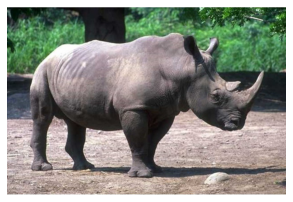

In [5]:
img = PILImage.create(next(iter(uploaded.keys())))
img.show()

Runs the uploaded image through the neural network to predict whether it is a cat or not.

Suggestion: insert a scratch code cell to evaluate is_cat and probs. 

Question: is it predicted to be a cat?

Question: With what probability?

In [6]:
is_cat, _, probs = learn.predict(img)